# Trabajo práctico 1
Arelis Picado

Diego Solís

Isaac Vargas

## 1. Sistemas lineales

### 1.1 Demostracion de linealidad

Demuestre que los siguientes sistemas $L{·}$ (con entrada $u(t)$ y salida $g(t)$, y $h(t)$ una función cualquiera) son lineales o no lineales. Además, muestrelo con una implementación en Pytorch, usando como entrada un arreglo de 50 valores generados al azar. Si va a demostrar por contraejemplo, muestre las entradas y salidas de la corrida en Pytorch que demuestran el no cumplimiento de la propiedad.

1. $g(t) = u(t) + 3$
2. $g(t) = u(t) h(t)$
3. $g(t) = max(u(t))$
4. $g(t) = |u(t)|$

In [4]:
# 1.1.1 g(t) = u(t) + 3
import torch

is_additive_satisfied1 = False
is_homogeneity_satisfied1 = False

def verify_additivity1(d = 50):
    global is_additive_satisfied1

    x = torch.rand(d)
    v = torch.rand(d)
    left_side = (x + v + 3)
    right_side = (x + 3 + v + 3)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_additive_satisfied1 = torch.all(torch.isclose(left_side, right_side, atol=1e-05))
    print("is_additive_satisfied: ", is_additive_satisfied1)

def verify_homogeneity1(d = 50):
    global is_homogeneity_satisfied1

    x = torch.rand(d)
    alpha = torch.rand(1)
    left_side = ((alpha * x) + 3) 
    right_side = (torch.abs(alpha) * (x + 3))
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_homogeneity_satisfied1 = torch.all(torch.isclose(left_side, right_side, atol=1e-05))
    print("is_homogeneity_satisfied: ", is_homogeneity_satisfied1)

verify_additivity1()
verify_homogeneity1()

if is_additive_satisfied1 and is_homogeneity_satisfied1:
    print("The system is linear")
else: 
    print("The system is not linear")

left_side:  tensor([4.5885, 4.0297, 3.8289, 3.6882, 3.3198, 4.1158, 4.6560, 3.6892, 3.9646,
        4.3098, 3.9791, 3.8234, 4.1721, 4.0763, 3.9539, 3.7113, 3.6958, 4.7831,
        4.4524, 4.0972, 4.1572, 3.6621, 4.4169, 3.5625, 4.3186, 3.8655, 3.3546,
        4.6071, 3.5137, 4.0975, 3.7708, 3.5273, 4.1642, 3.7917, 4.0868, 4.5213,
        4.2134, 4.4680, 4.1919, 4.0531, 4.1059, 3.7849, 4.0208, 4.7874, 4.5178,
        3.3290, 3.9267, 3.5745, 3.9793, 3.7483])
right_side:  tensor([7.5885, 7.0297, 6.8289, 6.6882, 6.3198, 7.1158, 7.6560, 6.6892, 6.9646,
        7.3098, 6.9791, 6.8234, 7.1721, 7.0763, 6.9539, 6.7113, 6.6958, 7.7831,
        7.4524, 7.0972, 7.1572, 6.6621, 7.4169, 6.5625, 7.3186, 6.8655, 6.3546,
        7.6071, 6.5137, 7.0975, 6.7708, 6.5273, 7.1642, 6.7917, 7.0868, 7.5213,
        7.2134, 7.4680, 7.1919, 7.0531, 7.1059, 6.7849, 7.0208, 7.7874, 7.5178,
        6.3290, 6.9267, 6.5745, 6.9793, 6.7483])
is_additive_satisfied:  tensor(False)
left_side:  tensor([3.5569, 3.0594, 3.3

In [23]:
# 1.1.2 g(t) = u(t)*h(t)

is_additive_satisfied2 = False
is_homogeneity_satisfied2 = False

def verify_additivity2(d = 50):
    global is_additive_satisfied2
    x = torch.rand(d)
    v = torch.rand(d)
    h = torch.rand(d)

    left_side = (x+v)*h
    right_side = (x*h)+(v*h)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_additive_satisfied2 = torch.all(torch.isclose(left_side, right_side))
    print("is_additive_satisfied: ", is_additive_satisfied2)

def verify_homogeneity2(d = 50):
    global is_homogeneity_satisfied2
    x = torch.rand(d)
    h = torch.rand(d)
    alpha = torch.rand(1)
    left_side = ((torch.abs(alpha) * x) * h) 
    right_side = (alpha * (x * h))
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_homogeneity_satisfied2 = torch.all(torch.isclose(left_side, right_side))
    print("is_homogeneity_satisfied: ", is_homogeneity_satisfied2)

verify_additivity2()
verify_homogeneity2()

if is_additive_satisfied2 and is_homogeneity_satisfied2:
    print("The system is linear")
else: 
    print("The system is not linear")

left_side:  tensor([0.2884, 0.7433, 0.3388, 0.2005, 1.7082, 0.2851, 0.1470, 0.0983, 0.5147,
        0.4951, 0.2363, 0.3712, 0.0256, 1.0729, 0.2258, 0.6397, 0.1747, 0.1461,
        0.0617, 0.3436, 0.3409, 0.8897, 0.0994, 1.1249, 0.5091, 0.7770, 0.6926,
        0.1510, 0.2163, 0.1578, 0.9647, 0.0029, 0.5791, 0.1765, 1.1364, 0.8754,
        0.6326, 1.3439, 0.2102, 0.1485, 0.3477, 0.0639, 0.1425, 0.0723, 0.9288,
        1.3789, 1.1816, 0.9576, 0.8067, 0.0427])
right_side:  tensor([0.2884, 0.7433, 0.3388, 0.2005, 1.7082, 0.2851, 0.1470, 0.0983, 0.5147,
        0.4951, 0.2363, 0.3712, 0.0256, 1.0729, 0.2258, 0.6397, 0.1747, 0.1461,
        0.0617, 0.3436, 0.3409, 0.8897, 0.0994, 1.1249, 0.5091, 0.7770, 0.6926,
        0.1510, 0.2163, 0.1578, 0.9647, 0.0029, 0.5791, 0.1765, 1.1364, 0.8754,
        0.6326, 1.3439, 0.2102, 0.1485, 0.3477, 0.0639, 0.1425, 0.0723, 0.9288,
        1.3789, 1.1816, 0.9576, 0.8067, 0.0427])
is_additive_satisfied:  tensor(True)
left_side:  tensor([0.0115, 0.0984, 0.01

In [27]:
# 1.1.3 g(t) = max(u(t))

is_additive_satisfied3 = False
is_homogeneity_satisfied3 = False

def verify_additivity3(d = 50):
    global is_additive_satisfied3
    x = torch.rand(d)
    v = torch.rand(d)

    left_side = torch.abs(x+v)
    right_side = torch.abs(x) + torch.abs(v)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_additive_satisfied3 = torch.all(torch.isclose(left_side, right_side))
    print("is_additive_satisfied: ", is_additive_satisfied3)

def verify_homogeneity3(d = 50):
    global is_homogeneity_satisfied3
    x = torch.rand(d)
    alpha = torch.rand(1)
    left_side = (torch.abs(alpha) * torch.abs(x)) 
    right_side = torch.abs(alpha * x)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_homogeneity_satisfied3 = torch.all(torch.isclose(left_side, right_side))
    print("is_homogeneity_satisfied: ", is_homogeneity_satisfied3)

verify_additivity3()
verify_homogeneity3()

if is_additive_satisfied3 and is_homogeneity_satisfied3:
    print("The system is linear")
else: 
    print("The system is not linear")

left_side:  tensor([0.9301, 1.2131, 1.5501, 0.8497, 1.2535, 1.3633, 0.8413, 0.9234, 1.4522,
        0.1949, 1.1643, 1.5856, 1.0610, 0.8683, 1.0114, 1.4872, 1.4112, 0.3470,
        0.7237, 1.3221, 0.8356, 1.2084, 1.2525, 0.9096, 0.8510, 1.0439, 0.3066,
        0.8305, 1.5773, 1.9518, 1.4945, 1.6961, 0.5751, 1.4350, 1.5187, 0.1064,
        1.2898, 1.7495, 0.6715, 0.7788, 0.3325, 1.3831, 0.9739, 0.7489, 1.1416,
        0.9916, 1.3252, 1.7388, 1.1079, 0.9684])
right_side:  tensor([0.9301, 1.2131, 1.5501, 0.8497, 1.2535, 1.3633, 0.8413, 0.9234, 1.4522,
        0.1949, 1.1643, 1.5856, 1.0610, 0.8683, 1.0114, 1.4872, 1.4112, 0.3470,
        0.7237, 1.3221, 0.8356, 1.2084, 1.2525, 0.9096, 0.8510, 1.0439, 0.3066,
        0.8305, 1.5773, 1.9518, 1.4945, 1.6961, 0.5751, 1.4350, 1.5187, 0.1064,
        1.2898, 1.7495, 0.6715, 0.7788, 0.3325, 1.3831, 0.9739, 0.7489, 1.1416,
        0.9916, 1.3252, 1.7388, 1.1079, 0.9684])
is_additive_satisfied:  tensor(True)
left_side:  tensor([0.0873, 0.0711, 0.06

In [28]:
# 1.1.4 g(t) = |u(t)|

is_additive_satisfied4 = False
is_homogeneity_satisfied4 = False

def verify_additivity4(d = 50):
    global is_additive_satisfied4
    x = torch.rand(d)
    v = torch.rand(d)

    left_side = torch.max(x+v)
    right_side = torch.max(x) + torch.max(v)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_additive_satisfied4 = torch.all(torch.isclose(left_side, right_side))
    print("is_additive_satisfied: ", is_additive_satisfied4)

def verify_homogeneity4(d = 50):
    global is_homogeneity_satisfied4
    x = torch.rand(d)
    alpha = torch.rand(1)
    left_side = (torch.abs(alpha) * torch.max(x)) 
    right_side = torch.max(alpha * x)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_homogeneity_satisfied4 = torch.all(torch.isclose(left_side, right_side))
    print("is_homogeneity_satisfied: ", is_homogeneity_satisfied4)

verify_additivity4()
verify_homogeneity4()

if is_additive_satisfied4 and is_homogeneity_satisfied4:
    print("The system is linear")
else: 
    print("The system is not linear")

left_side:  tensor(1.7786)
right_side:  tensor(1.9664)
is_additive_satisfied:  tensor(False)
left_side:  tensor([0.3377])
right_side:  tensor(0.3377)
is_homogeneity_satisfied:  tensor(True)
The system is not linear


### 1.2 Pruebas de homogeneidad absoluta y superposición

Demuestre si los siguientes sistemas con múltiples variables de entrada $L{·}$ con entrada vectorial $\vec{u}$ y salida escalar $s \in \mathbb{R}$, cumplen la condición de homogeneidad absoluta ($L{rx} = |r|*L{x}$) y superposición.
Además, muéstrelo con una implementación en Pytorch, mostrando la propiedad con 50 vectores generados al azar.
Si realiza la demostración por contraejemplo, muestre las entradas y salidas de la corrida en Pytorch que demuestran el no cumplimiento de la propiedad.
1. Norma de Manhattan $l_1$
1. Norma Euclidiana $l_2$
1. Norma $l_{\infty}$

In [3]:
# 1.2.1 Norma Manhattan (L1)

import torch

is_superpos_satisfied1 = False
is_abshomo_satisfied1 = False

def verify_superpos1(d = 50):
    global is_superpos_satisfied1
    x = torch.rand(d)
    v = torch.rand(d)

    left_side = torch.norm(x+v)
    right_side = torch.norm(x) + torch.norm(v)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_superpos_satisfied1 = torch.all(torch.le(left_side, right_side))
    print("is_superposition_satisfied: ", is_superpos_satisfied1)

def verify_abshomo1(d = 50):
    global is_abshomo_satisfied1
    x = torch.rand(d)
    alpha = torch.rand(1)
    left_side = (torch.abs(alpha) * torch.max(x)) 
    right_side = torch.max(alpha * x)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_abshomo_satisfied1 = torch.all(torch.isclose(left_side, right_side))
    print("is_homogeneity_satisfied: ", is_abshomo_satisfied1)

verify_superpos1()
verify_abshomo1()



left_side:  tensor(7.5105)
right_side:  tensor(8.0617)
is_superposition_satisfied:  tensor(True)
left_side:  tensor([0.0627])
right_side:  tensor(0.0627)
is_homogeneity_satisfied:  tensor(True)


In [6]:
# 1.2.2 Norma Euclidiana (L2)

import torch

is_superpos_satisfied2 = False
is_abshomo_satisfied2 = False

def verify_superpos2(d = 50):
    global is_superpos_satisfied2
    x = torch.rand(d)
    v = torch.rand(d)

    left_side = torch.norm(x+v)
    right_side = torch.norm(x) + torch.norm(v)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_superpos_satisfied2 = torch.all(torch.le(left_side, right_side))
    print("is_superposition_satisfied: ", is_superpos_satisfied2)

def verify_abshomo2(d = 50):
    global is_abshomo_satisfied1
    x = torch.rand(d)
    alpha = torch.rand(1)
    left_side = (torch.abs(alpha) * torch.max(x)) 
    right_side = torch.max(alpha * x)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_abshomo_satisfied2 = torch.all(torch.isclose(left_side, right_side))
    print("is_homogeneity_satisfied: ", is_abshomo_satisfied2)

verify_superpos2()
verify_abshomo2()



left_side:  tensor(7.9542)
right_side:  tensor(8.4816)
is_superposition_satisfied:  tensor(True)
left_side:  tensor([0.3221])
right_side:  tensor(0.3221)
is_homogeneity_satisfied:  tensor(True)


## 2 Vectores
### 2.1 Graficación y propiedades de los vectores
#### 2.1.1 Usando Python grafique los siguientes vectores
$\vec{v}_1$ = $\begin{bmatrix}
-0.3 \\
0.4 \\
0.1
\end{bmatrix}$

$\vec{v}_2$ = $\begin{bmatrix}
0.5 \\
0.2 \\
0.1
\end{bmatrix}$

$\vec{v}_3$ = $\begin{bmatrix}
\frac{1}{\sqrt{2}} \\
\frac{-1}{\sqrt{2}} \\
0
\end{bmatrix}$

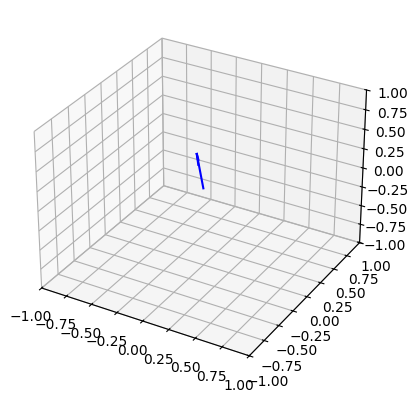

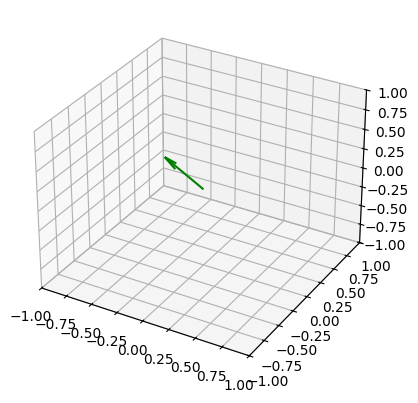

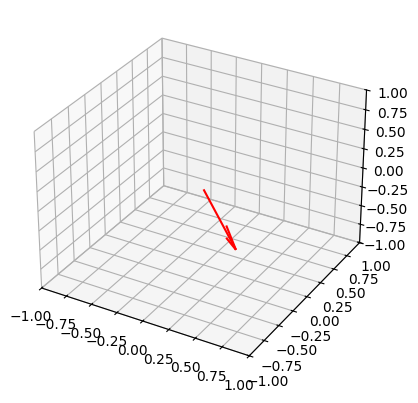

In [7]:
# Se importa la libreria de matplotlib y numpy
import matplotlib.pyplot as plt
import numpy as np

# Grafica de v1
v1 = np.array([-0.3, 0.4, 0.1])

# Se crea el eje 3D    
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

# Graficar el vector en el eje 3D
ax1.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='blue', length=1)

# Configurar los limites de los ejes
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax1.set_zlim([-1, 1])

# Mostrar la grafica
plt.show()

# Grafica de v2
v2 = np.array([-0.5, 0.2, 0.1])

# Se crea el eje 3D    
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

# Graficar el vector en el eje 3D
ax2.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='green', length=1)

# Configurar los limites de los ejes
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([-1, 1])

# Mostrar la grafica
plt.show()

# Definir el vector v3
v3 = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0])

# Se crea el eje 3D    
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')

# Graficar el vector en el eje 3D
ax3.quiver(0, 0, 0, v3[0], v3[1], v3[2], color='red', length=1)

# Configurar los limites de los ejes
ax3.set_xlim([-1, 1])
ax3.set_ylim([-1, 1])
ax3.set_zlim([-1, 1])

# Mostrar la grafica
plt.show()
                
